# import 

In [97]:
import copy

import nnabla as nn

import nnabla.functions as F
import nnabla.parametric_functions as PF
import nnabla.solvers as S
from nnabla.monitor import tile_images

import numpy as np
import matplotlib.pyplot as plt
import tiny_digits
from nnabla.monitor import tile_images
%matplotlib inline

np.random.seed(0)

# load digits

Num images: 1797
Image shape: (8, 8)
Labels: [0 1 2 3 4 5 6 7 8 9]


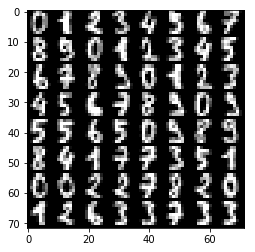

In [87]:
digits = tiny_digits.load_digits(n_class=10)
tiny_digits.plot_stats(digits)

In [88]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [89]:
digits['DESCR']

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [90]:
digits['data'].shape

(1797, 64)

In [91]:
digits['images'].shape

(1797, 8, 8)

In [92]:
digits['target'].shape

(1797,)

In [93]:
digits['target_names'].shape

(10,)

# image augmentation

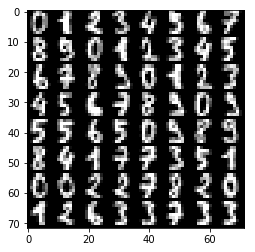

In [136]:
image = np.expand_dims(digits['images'][:64], 1)
x = nn.Variable(image.shape)
x.d = image
plt.imshow(tile_images(x.d), **dict(cmap='gray', interpolation='nearest'))

## Random Crop

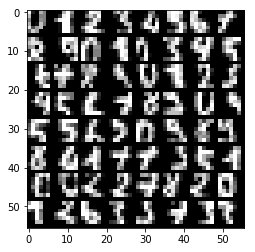

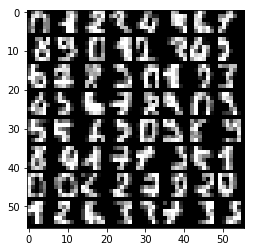

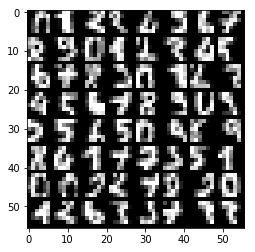

In [137]:
for i in range(3):
    with nn.auto_forward():
        cropped = F.random_crop(x, (6, 6))
    plt.imshow(tile_images(cropped.d), **dict(cmap='gray', interpolation='nearest'))
    plt.show()

## Random Flip

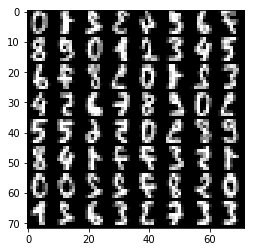

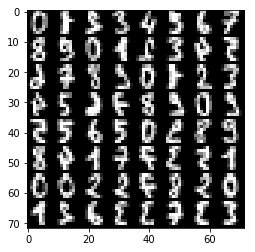

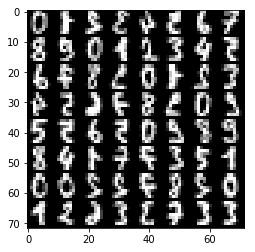

In [138]:
for i in range(3):
    with nn.auto_forward():
        flipped = F.random_flip(x)
    plt.imshow(tile_images(flipped.d), **dict(cmap='gray', interpolation='nearest'))
    plt.show()

## Random Shift

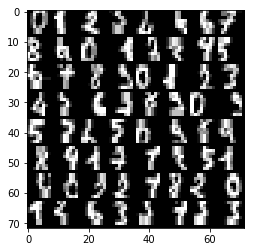

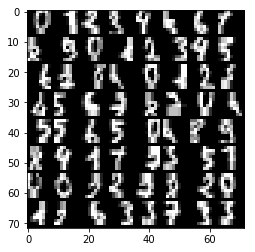

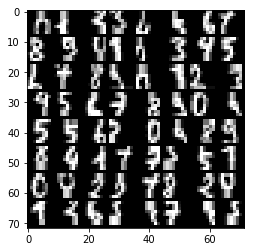

In [139]:
for i in range(3):
    with nn.auto_forward():
        shifted = F.random_shift(x, (2, 2))
    plt.imshow(tile_images(shifted.d), **dict(cmap='gray', interpolation='nearest'))
    plt.show()

## Image Augmentation

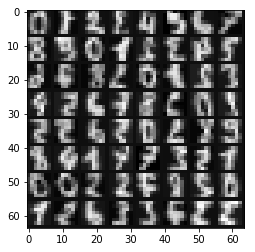

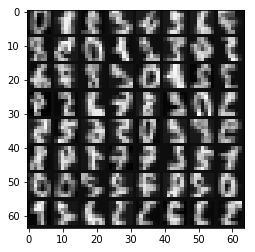

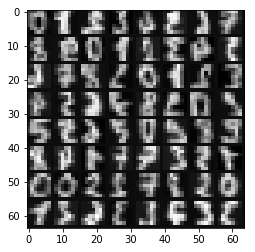

In [140]:
for i in range(3):
    with nn.auto_forward():
        augmented = F.image_augmentation(x, (1, 7, 7),
                                         min_scale=0.9, max_scale=1.1,
                                         angle=0.3, aspect_ratio=1.3, distortion=0.2,
                                         flip_lr=True, brightness=1,
                                         brightness_each=True,
                                         contrast=1.1, contrast_center=1)
    plt.imshow(tile_images(augmented.d), **dict(cmap='gray', interpolation='nearest'))
    plt.show()